In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv("data.csv")
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df = list(data.dtypes[data.dtypes == "object"].index)
df

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
for col in df:
    data[col] = data[col].str.lower().str.replace(' ', '_')
    data.head()

In [6]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [7]:
data.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [8]:
columns = ['make', 'model', 'year',  'engine_hp',
       'engine_cylinders', 'transmission_type',  'vehicle_style',
       'highway_mpg', 'city_mpg', 'msrp']

In [9]:
data = data[columns]
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920


In [10]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [11]:
data = data.fillna(0)
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920


In [12]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [13]:
data = data.copy()
mean = data["msrp"].mean()
data["average_price"] = np.where(data["msrp"]>=mean, 1, 0)

In [14]:
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,average_price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920,1


In [15]:
data = data.drop(["msrp"], axis = 1)
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,average_price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,1


In [16]:
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'average_price'],
      dtype='object')

In [17]:
data.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
average_price          int64
dtype: object

In [18]:
numerical_variables = [ "year", "engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]
numerical_variables

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

<Axes: >

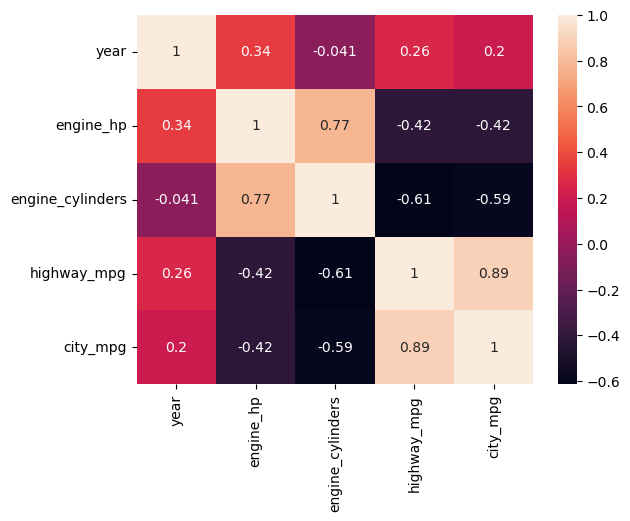

In [19]:
sns.heatmap(data[numerical_variables].corr(), annot = True)

In [20]:
seed = np.random.seed(1)
df_full_train, df_test = train_test_split(data, test_size = 0.2, random_state = seed)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = seed)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.average_price.values
y_val = df_val.average_price.values
y_test = df_test.average_price.values

del df_train["average_price"]
del df_val["average_price"]
del df_test["average_price"]

In [21]:
data.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
average_price          int64
dtype: object

In [22]:
categorical_variables = ["make", "model", "transmission_type", "vehicle_style"]
categorical_variables

['make', 'model', 'transmission_type', 'vehicle_style']

In [23]:
from sklearn.feature_extraction import DictVectorizer

In [24]:
dv = DictVectorizer(sparse = False)
train_dict = df_train[categorical_variables + numerical_variables].to_dict(orient = "records")
X_train = dv.fit_transform(train_dict)
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\ACE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
val_dict = df_val[categorical_variables + numerical_variables].to_dict(orient = "records")
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
average_price_decision = (y_pred >= 0.5)
accuracy_score = (y_val == average_price_decision).mean()
accuracy_score

np.float64(0.8955098615190936)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred >=0.5)

0.8955098615190936

In [27]:
threshold = np.linspace(0, 1, 101)

scores = []

for t in threshold:
    score = accuracy_score(y_val, y_pred >=t)
    print(t,score)
    scores.append(score)

0.0 0.26563155686109946
0.01 0.580360889634914
0.02 0.6516995383969786
0.03 0.6919848929920268
0.04 0.7343684431389006
0.05 0.761225346202266
0.06 0.7767519932857743
0.07 0.7851447754930759
0.08 0.7960553923625682
0.09 0.8052874527906001
0.1 0.8174569869911876
0.11 0.8266890474192194
0.12 0.8346621905161561
0.13 0.8375996642887117
0.14 0.8401174989509023
0.15 0.8455728073856483
0.16 0.8480906420478389
0.17 0.8539655895929501
0.18 0.8564834242551406
0.19 0.8573227024758707
0.2 0.8594208980276962
0.21 0.8619387326898867
0.22 0.8640369282417121
0.23 0.8652958455728074
0.24 0.8673940411246328
0.25 0.8694922366764583
0.26 0.873268988669744
0.27 0.873268988669744
0.28 0.8741082668904742
0.29 0.8774653797733949
0.3 0.8812421317666806
0.31 0.882920688208141
0.32 0.8841796055392362
0.33 0.8854385228703315
0.34 0.8871170793117918
0.35000000000000003 0.887956357532522
0.36 0.8908938313050776
0.37 0.8917331095258078
0.38 0.8921527486361729
0.39 0.892992026856903
0.4 0.8934116659672682
0.4100000000

In [28]:
y_pred

array([0.01582159, 0.0089876 , 0.97119932, ..., 0.00620818, 0.03947509,
       0.00132469])

In [29]:
t = 0.5

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

predicted_positive = (y_pred >=t)
predicted_negative = (y_pred < t)


tp = (actual_positive & predicted_positive).sum()
tn = (actual_negative & predicted_negative).sum()


fp = (predicted_positive & actual_negative).sum()
fn = (predicted_negative & actual_positive).sum()



confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [30]:
confusion_matrix

array([[1641,  109],
       [ 140,  493]])

In [31]:
p = tp / (tp + fp)

In [32]:
r = tp / (tp + fn)

In [33]:
p

np.float64(0.8189368770764119)

In [34]:
r

np.float64(0.7788309636650869)

In [35]:
for c in numerical_variables:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

     year, 0.684
engine_hp, 0.916
engine_cylinders, 0.769
highway_mpg, 0.632
 city_mpg, 0.671


In [36]:
for c in numerical_variables:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

     year, 0.684
engine_hp, 0.916
engine_cylinders, 0.769
highway_mpg, 0.632
 city_mpg, 0.671


In [37]:
def confusion_matrix(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:

        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)


        predicted_positive = (y_pred >= t)
        predicted_negative = (y_pred < t)


        tp = (actual_positive & predicted_positive).sum()
        tn = (actual_negative & predicted_negative).sum()

        fp = (predicted_positive & actual_negative).sum()
        fn = (predicted_negative & actual_positive).sum()

        scores.append((t, tp, tn, fp, fn))

    
    columns = ["threshold", "tp", "tn", "fp", "fn"]
    Data = pd.DataFrame(scores, columns = columns)
    
    return Data
        
        

In [38]:
Data = confusion_matrix(y_val, y_pred)
Data.iloc[::10]

,threshold,tp,tn,fp,fn
0,0.0,633,0,1750,0
10,0.1,606,1342,408,27
20,0.2,574,1474,276,59
30,0.3,554,1546,204,79
40,0.4,532,1597,153,101
50,0.5,493,1641,109,140
60,0.6,438,1679,71,195
70,0.7,387,1711,39,246
80,0.8,344,1727,23,289
90,0.9,271,1742,8,362


In [39]:
Data["p"] = Data.tp / (Data.tp + Data.fp)
Data["p"]

0      0.265632
1      0.387492
2      0.432580
3      0.462840
4      0.500000
         ...   
96     0.995025
97     0.994764
98     0.994286
99     0.993197
100         NaN
Name: p, Length: 101, dtype: float64

In [40]:
Data["r"] = Data.tp / (Data.tp + Data.fn)
Data["r"]

0      1.000000
1      0.998420
2      0.998420
3      0.993681
4      0.990521
         ...   
96     0.315956
97     0.300158
98     0.274882
99     0.230648
100    0.000000
Name: r, Length: 101, dtype: float64

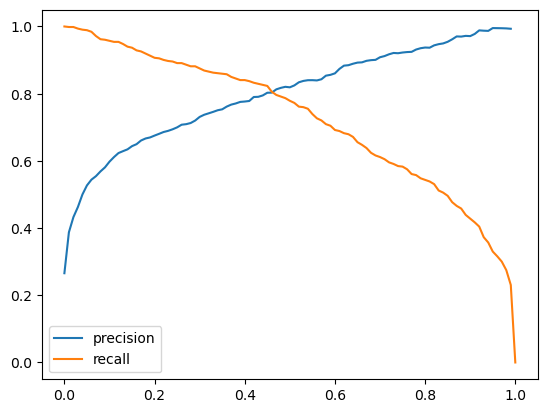

In [41]:
plt.plot(Data.threshold, Data["p"], label = "precision")
plt.plot(Data.threshold, Data["r"], label = "recall")
plt.legend()

In [42]:
Data["f1"] = 2 * Data.p * Data.r /( Data.p + Data.r)
Data["f1"]

0      0.419761
1      0.558304
2      0.603629
3      0.631526
4      0.664547
         ...   
96     0.479616
97     0.461165
98     0.430693
99     0.374359
100         NaN
Name: f1, Length: 101, dtype: float64

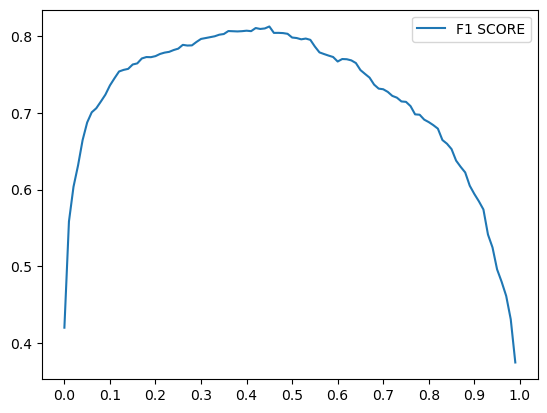

In [43]:
plt.plot(Data.threshold, Data["f1"], label = "F1 SCORE")
plt.xticks(np.linspace(0, 1, 11))
plt.legend()
plt.show()

In [44]:
from sklearn.model_selection  import KFold

In [45]:
def train(df_train, y_train, C = 1.0):
    dicts = df_train[categorical_variables + numerical_variables].to_dict(orient = "records")
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)
    model = LogisticRegression(solver = "liblinear", C = C, max_iter = 1000)
    model.fit(X_train, y_train)

    return dv, model

In [46]:
dv, model = train(df_train, y_train, C = 1.0)

In [47]:
dv

DictVectorizer(sparse=False)

In [48]:
model

LogisticRegression(max_iter=1000, solver='liblinear')

In [49]:
def prepare(df, dv, model):
    val_dict = df_val[categorical_variables + numerical_variables].to_dict(orient = "records")
    X = dv.transform(val_dict)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [50]:
y_pred = prepare(df_val, dv, model)
y_pred

array([0.01111389, 0.00174772, 0.99256503, ..., 0.00263719, 0.02027495,
       0.00296408])

In [51]:
y_pred = prepare(df_val, dv, model)
y_pred

array([0.01111389, 0.00174772, 0.99256503, ..., 0.00263719, 0.02027495,
       0.00296408])

In [52]:
auc = roc_auc_score(y_val, y_pred)
auc

np.float64(0.9806576393590611)

In [53]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.average_price
    y_val = df_val.average_price

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = prepare(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))
     

0.980 +- 0.003


In [54]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.average_price
        y_val = df_val.average_price

        dv, model = train(df_train, y_train, C=C)
        y_pred = prepare(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.952 +- 0.002
C= 0.1, 0.972 +- 0.001
C= 0.5, 0.978 +- 0.001
C=  10, 0.983 +- 0.002


In [55]:
scores

[np.float64(0.9817740560459809),
 np.float64(0.9808228328275498),
 np.float64(0.9847735764876472),
 np.float64(0.9798798170765713),
 np.float64(0.9853049728049728)]